In [25]:
# Dependencies
import requests
import numpy as np
import pandas as pd
import scipy.stats as st
import json
import matplotlib.pyplot as plt
from census import Census
import plotly.express as px

In [2]:
# Import U.S. Census API Key
from census_api import census_api_key

url = "https://api.census.gov/data"

In [3]:
#EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS 2019
earnings = "B19051_001E"
year_19 = "2019"

earnings_url = "http://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=state:*&key={2}".format(year_19, earnings, census_api_key)

earnings_2019 = requests.request("GET", earnings_url)

earnings_2019_df = pd.DataFrame(earnings_2019.json()[1:], columns=earnings_2019.json()[0])

earnings_2019_df.head()


,NAME,B19051_001E,state
0,Alabama,1867893,01
1,Alaska,253346,02
2,Arizona,2571268,04
3,Arkansas,1158071,05
4,California,13044266,06


In [4]:
earnings_2019_df
earnings_2019= earnings_2019_df.rename(columns={"B19051_001E": "EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS","NAME": "State"})
earnings_2019.drop(columns=["state"], inplace=True)
earnings_2019_2 = earnings_2019.astype({"EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS":int})
earnings_2019.head(10)

,State,EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS
0,Alabama,1867893
1,Alaska,253346
2,Arizona,2571268
3,Arkansas,1158071
4,California,13044266
5,Colorado,2148994
6,Delaware,363322
7,District of Columbia,284386
8,Connecticut,1370746
9,Florida,7736311


In [5]:
sorted_earnings_2019 = earnings_2019.sort_values(by=["EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS"], ascending=False)
sorted_earnings_2019.head()

,State,EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS
45,Utah,977313
43,Texas,9691647
31,New Mexico,780249
9,Florida,7736311
27,Nebraska,759176


In [6]:
#EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS 2020
earnings = "B19051_001E"
year_20 = "2020"

earnings_url_20 = "http://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=state:*&key={2}".format(year_20, earnings, census_api_key)

earnings_2020 = requests.request("GET", earnings_url_20)

earnings_2020_df = pd.DataFrame(earnings_2020.json()[1:], columns=earnings_2020.json()[0])

earnings_2020_df.head()

,NAME,B19051_001E,state
0,Pennsylvania,5106601,42
1,California,13103114,06
2,West Virginia,734235,54
3,Utah,1003345,49
4,New York,7417224,36


In [7]:
earnings_2020_df
earnings_2020= earnings_2020_df.rename(columns={"B19051_001E": "EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS","NAME": "State"})
earnings_2020.drop(columns=["state"], inplace=True)
earnings_2020_2 = earnings_2020.astype({"EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS":int})
earnings_2020.head(10)

,State,EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS
0,Pennsylvania,5106601
1,California,13103114
2,West Virginia,734235
3,Utah,1003345
4,New York,7417224
5,District of Columbia,288307
6,Alaska,255173
7,Florida,7931313
8,South Carolina,1961481
9,North Dakota,320873


In [8]:
#EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS 2021
earnings = "B19051_001E"
year_21 = "2021"

earnings_url_21 = "http://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=state:*&key={2}".format(year_21, earnings, census_api_key)

earnings_2021 = requests.request("GET", earnings_url_21)

earnings_2021_df = pd.DataFrame(earnings_2021.json()[1:], columns=earnings_2021.json()[0])

earnings_2021_df.head()

,NAME,B19051_001E,state
0,Alabama,1902983,01
1,Alaska,260561,02
2,Arizona,2683557,04
3,Arkansas,1158460,05
4,California,13217586,06


In [9]:
earnings_2021_df
earnings_2021= earnings_2021_df.rename(columns={"B19051_001E": "EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS","NAME": "State"})
earnings_2021.drop(columns=["state"], inplace=True)
earnings_2021_2 = earnings_2021.astype({"EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS":int})
earnings_2021.head(10)

,State,EARNINGS IN THE PAST 12 MONTHS FOR HOUSEHOLDS
0,Alabama,1902983
1,Alaska,260561
2,Arizona,2683557
3,Arkansas,1158460
4,California,13217586
5,Colorado,2227932
6,Connecticut,1397324
7,Delaware,381097
8,District of Columbia,310104
9,Florida,8157420


In [10]:
#combine 2019 & 2020
earnings_df = pd.merge(earnings_2019_df,earnings_2020_df, on="NAME")
earnings_df

earnings = earnings_df.rename(columns={"B19051_001E_x": "2019", "B19051_001E_y": "2020"})
earnings

#combine 2019/2020 & 2021
earnings_2_df = pd.merge(earnings_df,earnings_2021_df, on="NAME")
earnings_2 = earnings_2_df.rename(columns={"B19051_001E_x": "2019", "B19051_001E_y": "2020","B19051_001E": "2021"})

earnings_2.drop(columns=["state_x", "state_y", "state"], inplace=True)
earnings_2.head(10)

,NAME,2019,2020,2021
0,Alabama,1867893,1888504,1902983
1,Alaska,253346,255173,260561
2,Arizona,2571268,2643430,2683557
3,Arkansas,1158071,1170544,1158460
4,California,13044266,13103114,13217586
5,Colorado,2148994,2137402,2227932
6,Delaware,363322,370953,381097
7,District of Columbia,284386,288307,310104
8,Connecticut,1370746,1385437,1397324
9,Florida,7736311,7931313,8157420


In [11]:
earnings_2 = earnings_2.astype({"2019": int, "2020": int, "2021":int}, errors='raise')
earnings_2


,NAME,2019,2020,2021
0,Alabama,1867893,1888504,1902983
1,Alaska,253346,255173,260561
2,Arizona,2571268,2643430,2683557
3,Arkansas,1158071,1170544,1158460
4,California,13044266,13103114,13217586
5,Colorado,2148994,2137402,2227932
6,Delaware,363322,370953,381097
7,District of Columbia,284386,288307,310104
8,Connecticut,1370746,1385437,1397324
9,Florida,7736311,7931313,8157420


In [14]:
# reorganize data frame with name column values in alphabetical order
earnings_df = earnings_2.sort_values(by=["NAME"], ascending=True)
# rename NAME column to STATE
earnings_df = earnings_df.rename(columns={"NAME": "STATE"})
earnings_df

,STATE,2019,2020,2021
0,Alabama,1867893,1888504,1902983
1,Alaska,253346,255173,260561
2,Arizona,2571268,2643430,2683557
3,Arkansas,1158071,1170544,1158460
4,California,13044266,13103114,13217586
5,Colorado,2148994,2137402,2227932
8,Connecticut,1370746,1385437,1397324
6,Delaware,363322,370953,381097
7,District of Columbia,284386,288307,310104
9,Florida,7736311,7931313,8157420


In [12]:
# import csv
pop_change_df = pd.read_csv("../Census_data/pop_change.csv")
pop_change_df

,STATE,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200
4,California,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362
8,District of Columbia,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255


In [15]:
# merge data frames
pop_earnings_df = pd.merge(earnings_df, pop_change_df, on="STATE")
pop_earnings_df

,STATE,2019,2020,2021,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT
0,Alabama,1867893,1888504,1902983,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963
1,Alaska,253346,255173,260561,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896
2,Arizona,2571268,2643430,2683557,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832
3,Arkansas,1158071,1170544,1158460,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200
4,California,13044266,13103114,13217586,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625
5,Colorado,2148994,2137402,2227932,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985
6,Connecticut,1370746,1385437,1397324,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676
7,Delaware,363322,370953,381097,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362
8,District of Columbia,284386,288307,310104,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997
9,Florida,7736311,7931313,8157420,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255


In [16]:
# create a column for the average earnings per state
pop_earnings_df["Average Earnings"] = (pop_earnings_df["2019"] + pop_earnings_df["2020"] + pop_earnings_df["2021"])/3
pop_earnings_df

,STATE,2019,2020,2021,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Average Earnings
0,Alabama,1867893,1888504,1902983,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963,1.886460e+06
1,Alaska,253346,255173,260561,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896,2.563600e+05
2,Arizona,2571268,2643430,2683557,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832,2.632752e+06
3,Arkansas,1158071,1170544,1158460,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200,1.162358e+06
4,California,13044266,13103114,13217586,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625,1.312166e+07
5,Colorado,2148994,2137402,2227932,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985,2.171443e+06
6,Connecticut,1370746,1385437,1397324,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676,1.384502e+06
7,Delaware,363322,370953,381097,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,3.717907e+05
8,District of Columbia,284386,288307,310104,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997,2.942657e+05
9,Florida,7736311,7931313,8157420,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,7.941681e+06


In [77]:
# remove outliers from data frame
pop_earnings_df2 = pop_earnings_df.loc[pop_earnings_df["STATE"] != "California"]
pop_earnings_df2 = pop_earnings_df2.loc[pop_earnings_df2["STATE"] != "New York"]
pop_earnings_df2 = pop_earnings_df2.loc[pop_earnings_df2["STATE"] != "Texas"]
pop_earnings_df2 = pop_earnings_df2.loc[pop_earnings_df2["STATE"] != "Florida"]

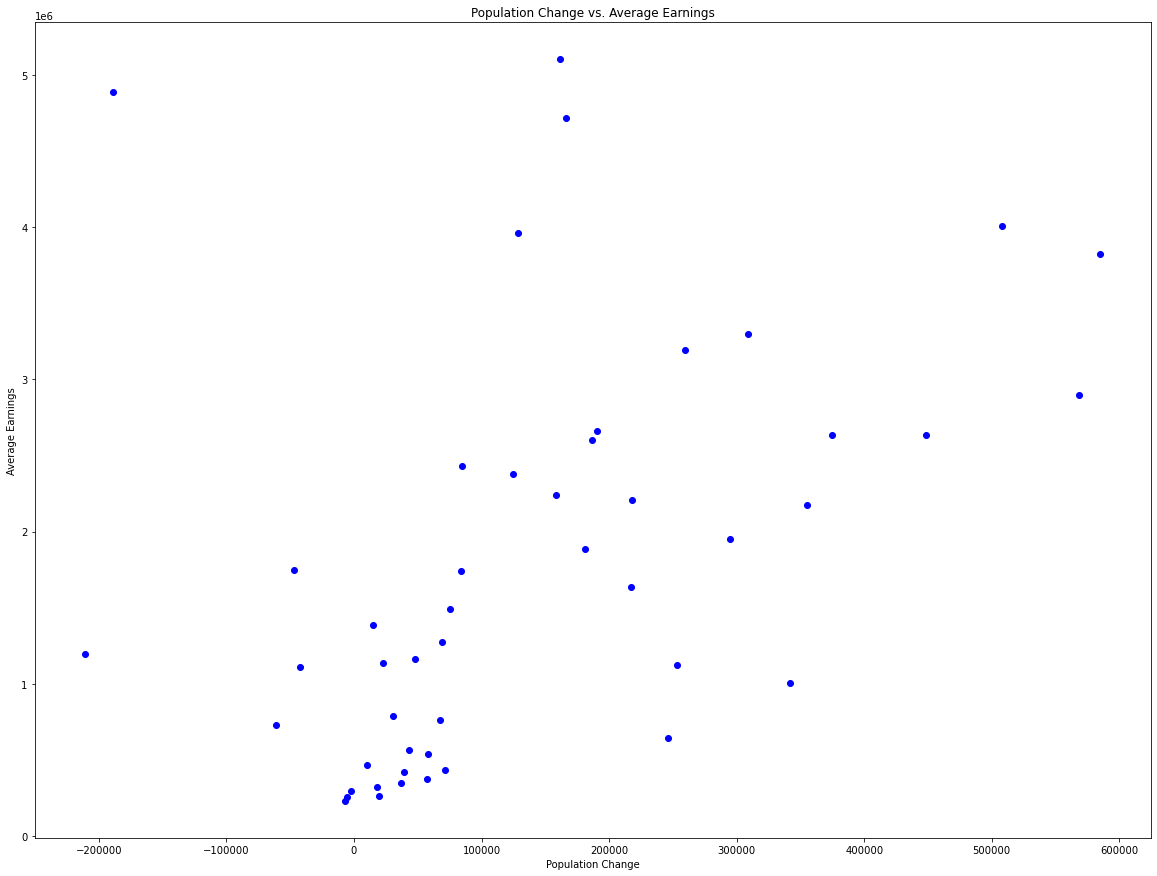

In [78]:
# create a scatter plot with matplotlib to show the relationship between population change and average earnings
plt.figure(figsize=(20,15))
plt.plot(pop_earnings_df2["POP_CHANGE_TOTAL"], pop_earnings_df2["Average Earnings"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change")
plt.ylabel("Average Earnings")
plt.title("Population Change vs. Average Earnings")
plt.show()

The correlation between both factors is 0.45


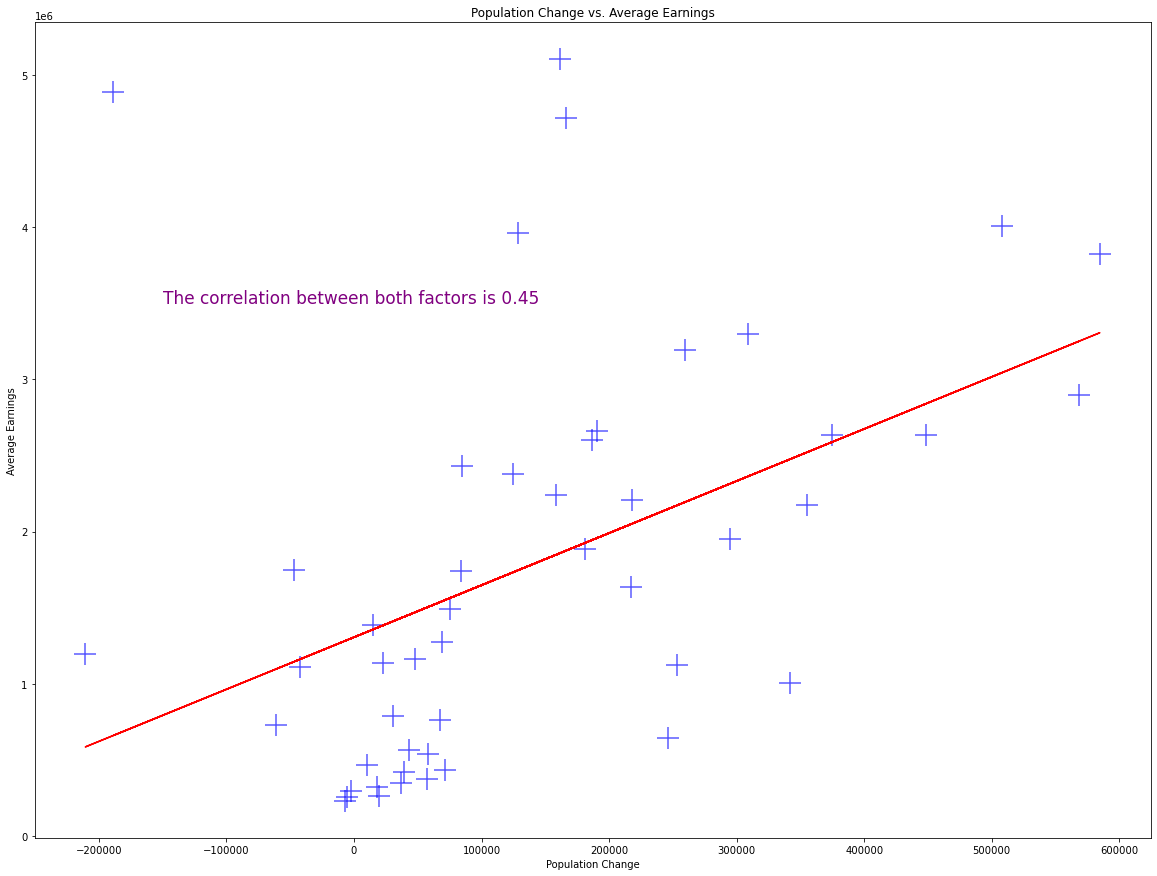

In [98]:
# create a linear regression model for the average earnings per state vs total population change
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(pop_earnings_df2["POP_CHANGE_TOTAL"], pop_earnings_df2["Average Earnings"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = pop_earnings_df2["POP_CHANGE_TOTAL"]
y_values = pop_earnings_df2["Average Earnings"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change")
plt.ylabel("Average Earnings")
plt.title("Population Change vs. Average Earnings")
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(-150000,3500000) , fontsize=17,color="purple")
plt.savefig("pop_change_vs_earnings.png")
plt.show()

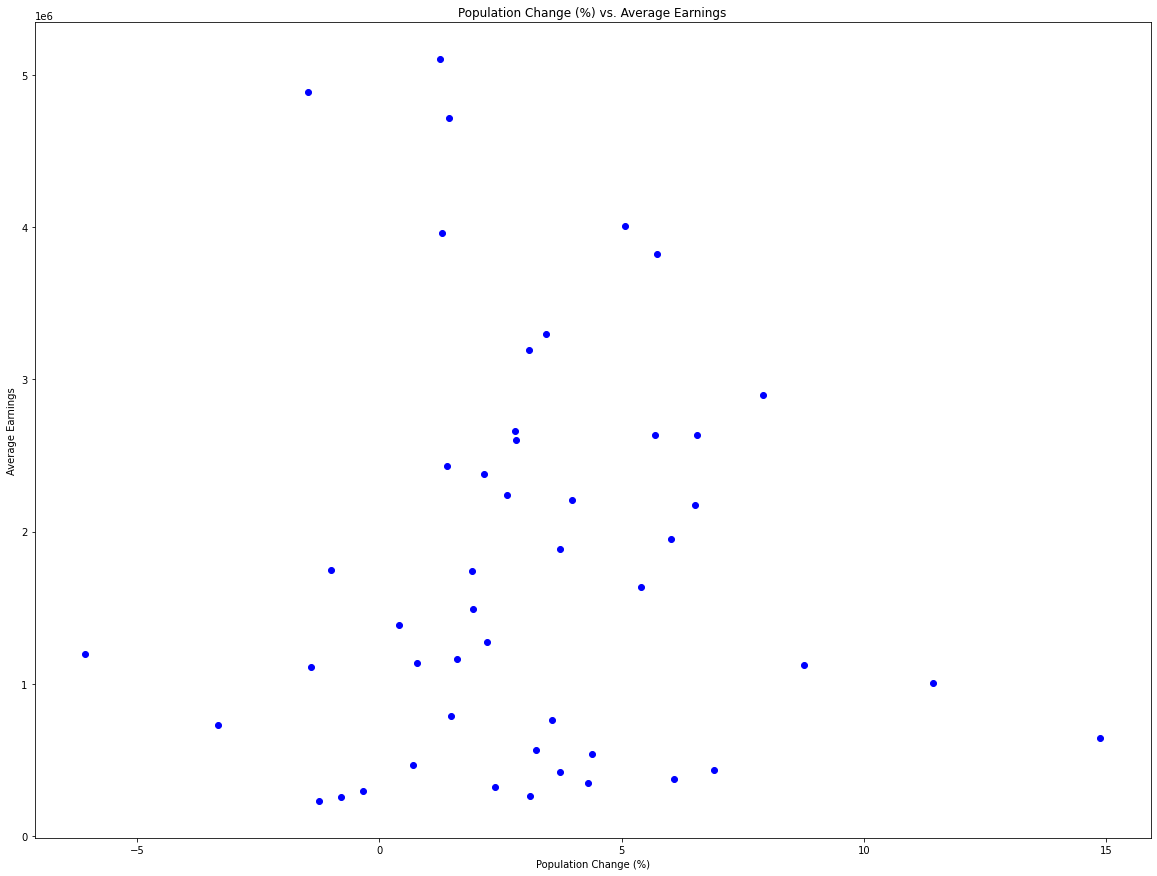

In [82]:
# create a scatter plot with matplotlib to show the relationship between average population change and average earnings
plt.figure(figsize=(20,15))
plt.plot(pop_earnings_df2["POP_CHANGE_PCT"], pop_earnings_df2["Average Earnings"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Average Earnings")
plt.title("Population Change (%) vs. Average Earnings")
plt.show()

The correlation between both factors is -0.01


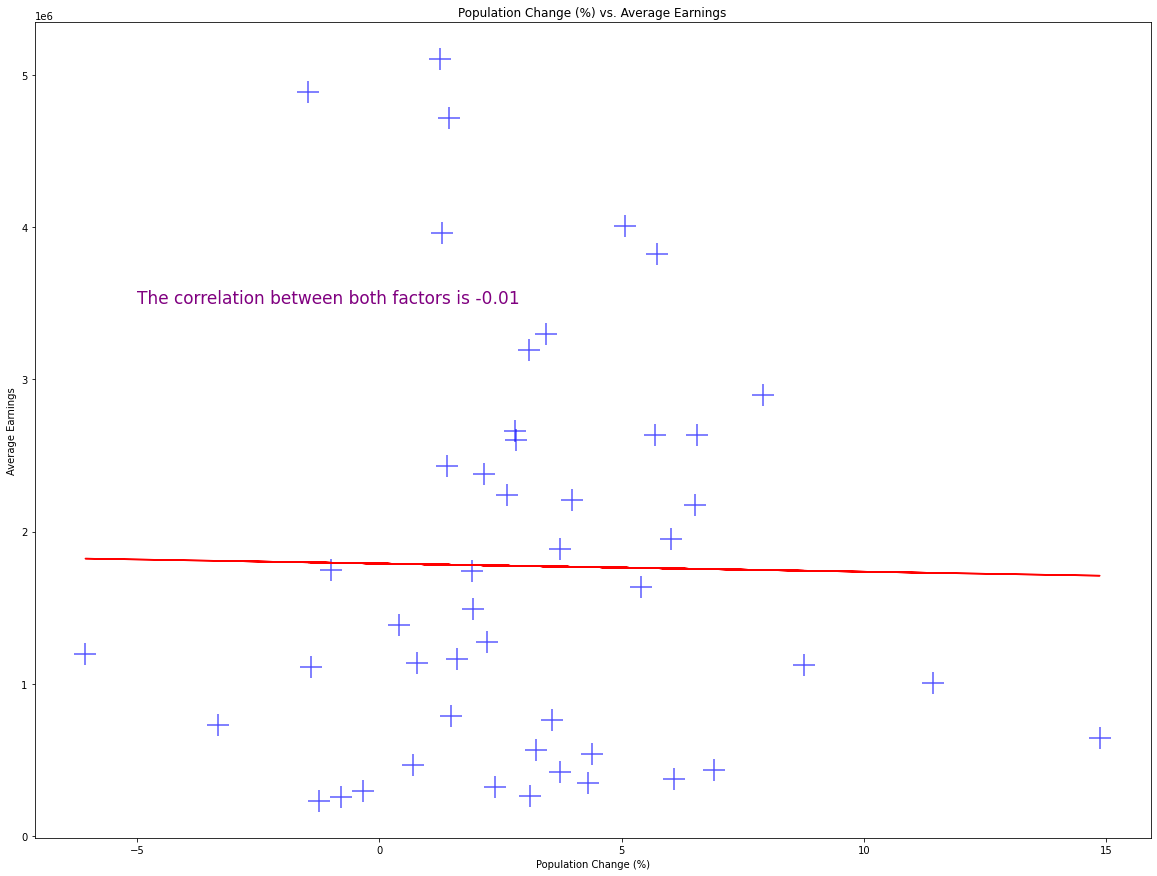

In [99]:
# create a linear regression model for the average earnings per state vs average population change
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(pop_earnings_df2["POP_CHANGE_PCT"], pop_earnings_df2["Average Earnings"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = pop_earnings_df2["POP_CHANGE_PCT"]
y_values = pop_earnings_df2["Average Earnings"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)")
plt.ylabel("Average Earnings")
plt.title("Population Change (%) vs. Average Earnings")
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(-5,3500000) , fontsize=17,color="purple")
plt.savefig("pop_change_avg_vs_earnings.png")
plt.show()

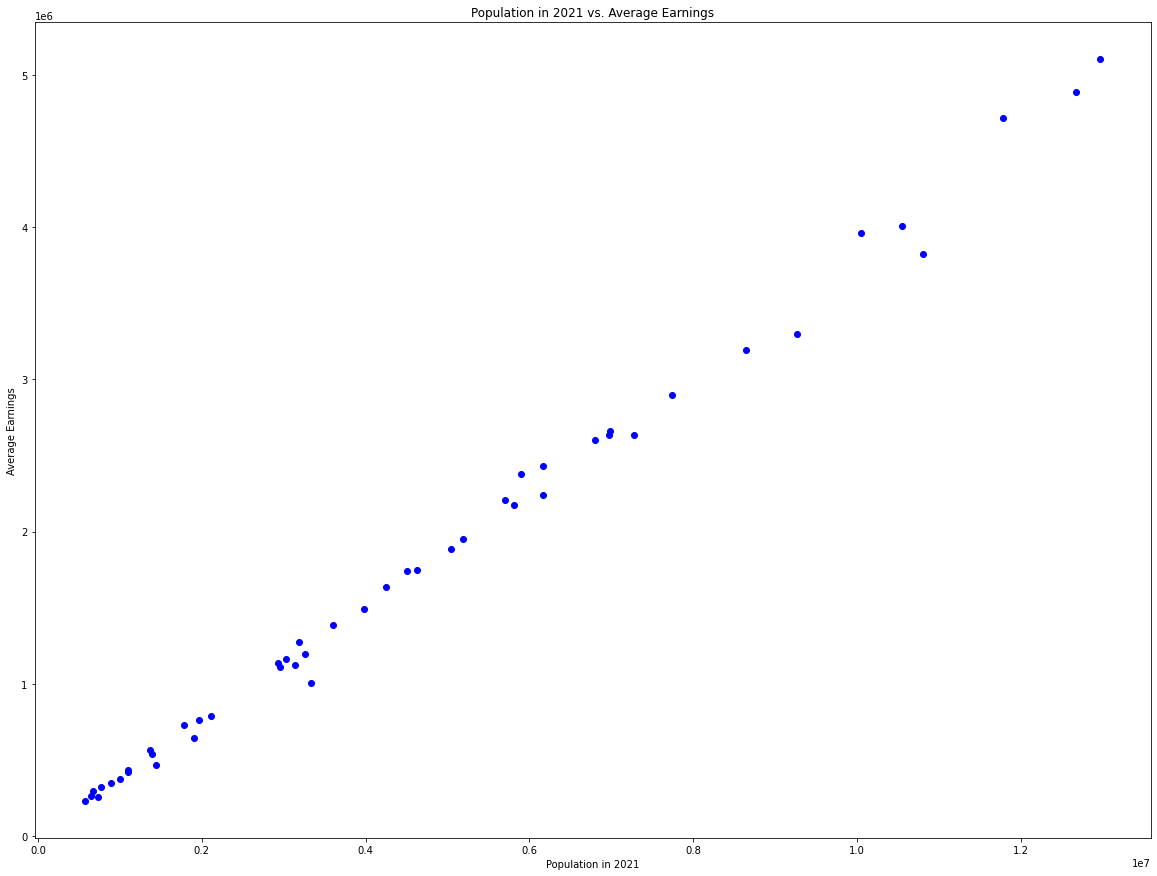

In [85]:
# create a scatter plot with matplotlib to show the relationship between population in 2021 and average earnings
plt.figure(figsize=(20,15))
plt.plot(pop_earnings_df2["POP_2021"], pop_earnings_df2["Average Earnings"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population in 2021")
plt.ylabel("Average Earnings")
plt.title("Population in 2021 vs. Average Earnings")
plt.show()

The correlation between both factors is 1.0


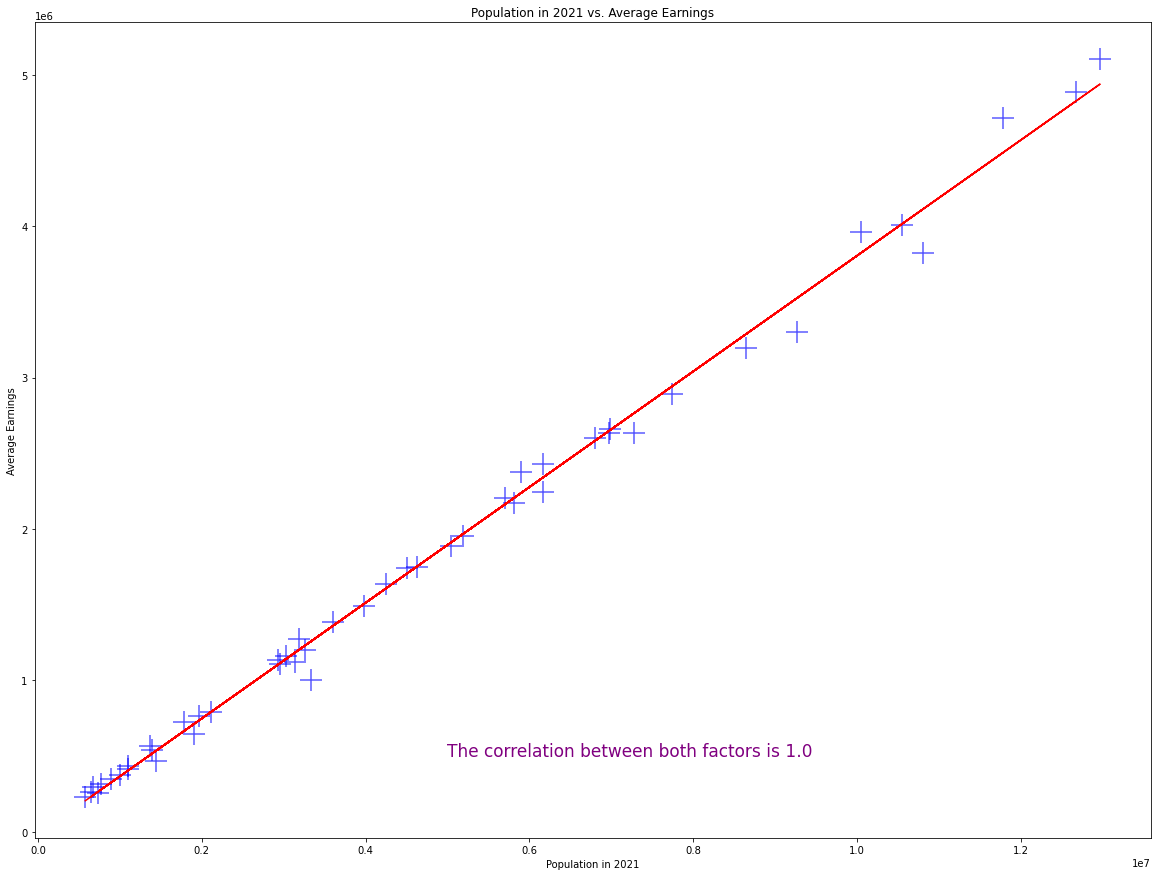

In [97]:
# create a linear regression model for the average earnings per state vs Total population in 2021
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(pop_earnings_df2["POP_2021"], pop_earnings_df2["Average Earnings"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = pop_earnings_df2["POP_2021"]
y_values = pop_earnings_df2["Average Earnings"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population in 2021")
plt.ylabel("Average Earnings")
plt.title("Population in 2021 vs. Average Earnings")
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(5000000,500000) , fontsize=17,color="purple")
plt.savefig("pop_2021_vs_earnings.png")
plt.show()

In [30]:
# create a dataframe for the top 7 states with the highest average earnings
top_7_earnings = pop_earnings_df.sort_values(by=["Average Earnings"], ascending=False).head(7)
top_7_earnings

,STATE,2019,2020,2021,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Average Earnings
4,California,13044266,13103114,13217586,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625,1.312166e+07
44,Texas,9691647,9906070,10239341,27469114.0,27862596.0,28304596.0,28701845.0,28995881.0,29217653.0,29527941.0,2058827.0,7.495062,9.945686e+06
9,Florida,7736311,7931313,8157420,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,7.941681e+06
32,New York,7343234,7417224,7530150,19795791.0,19745289.0,19849399.0,19542209.0,19453561.0,20154933.0,19835913.0,40122.0,0.202679,7.430203e+06
38,Pennsylvania,5053106,5106601,5147783,12802503.0,12784227.0,12805537.0,12807060.0,12801989.0,12989625.0,12964056.0,161553.0,1.261886,5.102497e+06
13,Illinois,4846134,4884061,4930255,12859995.0,12801539.0,12802023.0,12741080.0,12671821.0,12785245.0,12671469.0,-188526.0,-1.465988,4.886817e+06
35,Ohio,4676358,4717226,4754161,11613423.0,11614373.0,11658609.0,11689442.0,11689100.0,11790587.0,11780017.0,166594.0,1.434495,4.715915e+06


In [63]:
# create a list of the top 7 states with the highest average earnings
state = top_7_earnings["STATE"].tolist()
# create a list of years from 2015 to 2021
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
# create a list of population values per year for each state
californinia = [top_7_earnings['POP_2015'].tolist()[0], top_7_earnings['POP_2016'].tolist()[0], top_7_earnings['POP_2017'].tolist()[0], top_7_earnings['POP_2018'].tolist()[0], top_7_earnings['POP_2019'].tolist()[0], top_7_earnings['POP_2020'].tolist()[0], top_7_earnings['POP_2021'].tolist()[0]]
texas = [top_7_earnings['POP_2015'].tolist()[1], top_7_earnings['POP_2016'].tolist()[1], top_7_earnings['POP_2017'].tolist()[1], top_7_earnings['POP_2018'].tolist()[1], top_7_earnings['POP_2019'].tolist()[1], top_7_earnings['POP_2020'].tolist()[1], top_7_earnings['POP_2021'].tolist()[1]]
florida = [top_7_earnings['POP_2015'].tolist()[2], top_7_earnings['POP_2016'].tolist()[2], top_7_earnings['POP_2017'].tolist()[2], top_7_earnings['POP_2018'].tolist()[2], top_7_earnings['POP_2019'].tolist()[2], top_7_earnings['POP_2020'].tolist()[2], top_7_earnings['POP_2021'].tolist()[2]]
new_york = [top_7_earnings['POP_2015'].tolist()[3], top_7_earnings['POP_2016'].tolist()[3], top_7_earnings['POP_2017'].tolist()[3], top_7_earnings['POP_2018'].tolist()[3], top_7_earnings['POP_2019'].tolist()[3], top_7_earnings['POP_2020'].tolist()[3], top_7_earnings['POP_2021'].tolist()[3]]
pennsylvania = [top_7_earnings['POP_2015'].tolist()[4], top_7_earnings['POP_2016'].tolist()[4], top_7_earnings['POP_2017'].tolist()[4], top_7_earnings['POP_2018'].tolist()[4], top_7_earnings['POP_2019'].tolist()[4], top_7_earnings['POP_2020'].tolist()[4], top_7_earnings['POP_2021'].tolist()[4]]
illinois = [top_7_earnings['POP_2015'].tolist()[5], top_7_earnings['POP_2016'].tolist()[5], top_7_earnings['POP_2017'].tolist()[5], top_7_earnings['POP_2018'].tolist()[5], top_7_earnings['POP_2019'].tolist()[5], top_7_earnings['POP_2020'].tolist()[5], top_7_earnings['POP_2021'].tolist()[5]]
ohio = [top_7_earnings['POP_2015'].tolist()[6], top_7_earnings['POP_2016'].tolist()[6], top_7_earnings['POP_2017'].tolist()[6], top_7_earnings['POP_2018'].tolist()[6], top_7_earnings['POP_2019'].tolist()[6], top_7_earnings['POP_2020'].tolist()[6], top_7_earnings['POP_2021'].tolist()[6]]
# create a dataframe from the lists
top_7_df = pd.DataFrame({"State": state, "Year": year, "California": californinia, "Texas": texas, "Florida": florida, "New York": new_york, "Pennsylvania": pennsylvania, "Illinois": illinois, "Ohio": ohio})
top_7_df2 = top_7_df.melt(id_vars=["State", "Year"], var_name="State2", value_name="Population")
# drop the extra state column
top_7_df2.drop(columns=["State"], inplace=True)
# rename the state column to State
top_7_df2 = top_7_df2.rename(columns={"State2": "State"})
top_7_df2
# create animated bar chart with plotly express
fig = px.bar(top_7_df2, x='State', y='Population', animation_frame='Year', animation_group='State', color='State', range_y=[0, 40000000], title='Population Change in Top 7 States with Highest Average Earnings', width=1250, height=1000)
fig.show()

In [64]:
# create a dataframe for the bottom 5 states with the lowest average earnings
bottom_7_earnings = pop_earnings_df.sort_values(by=["Average Earnings"], ascending=True).head(7)
bottom_7_earnings

,STATE,2019,2020,2021,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Average Earnings
51,Wyoming,230101,233231,230653,586107.0,585501.0,579315.0,577737.0,578759.0,577267.0,578803.0,-7304.0,-1.246189,231328.333333
1,Alaska,253346,255173,260561,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896,256360.000000
46,Vermont,260029,262852,262514,626042.0,624594.0,623657.0,626299.0,623989.0,642495.0,645570.0,19528.0,3.119280,261798.333333
8,District of Columbia,284386,288307,310104,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997,294265.666667
34,North Dakota,318322,320873,316542,756927.0,757952.0,755393.0,760077.0,762062.0,778962.0,774948.0,18021.0,2.380811,318579.000000
42,South Dakota,344397,347878,345779,858469.0,865454.0,869666.0,882235.0,884659.0,887099.0,895376.0,36907.0,4.299165,346018.000000
7,Delaware,363322,370953,381097,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,371790.666667


In [67]:
# create a list of the bottom 7 states with the lowest average earnings
state2 = bottom_7_earnings["STATE"].tolist()
# create a list of population values per year for each state
wyoming = [bottom_7_earnings['POP_2015'].tolist()[0], bottom_7_earnings['POP_2016'].tolist()[0], bottom_7_earnings['POP_2017'].tolist()[0], bottom_7_earnings['POP_2018'].tolist()[0], bottom_7_earnings['POP_2019'].tolist()[0], bottom_7_earnings['POP_2020'].tolist()[0], bottom_7_earnings['POP_2021'].tolist()[0]]
alaska = [bottom_7_earnings['POP_2015'].tolist()[1], bottom_7_earnings['POP_2016'].tolist()[1], bottom_7_earnings['POP_2017'].tolist()[1], bottom_7_earnings['POP_2018'].tolist()[1], bottom_7_earnings['POP_2019'].tolist()[1], bottom_7_earnings['POP_2020'].tolist()[1], bottom_7_earnings['POP_2021'].tolist()[1]]
vermont = [bottom_7_earnings['POP_2015'].tolist()[2], bottom_7_earnings['POP_2016'].tolist()[2], bottom_7_earnings['POP_2017'].tolist()[2], bottom_7_earnings['POP_2018'].tolist()[2], bottom_7_earnings['POP_2019'].tolist()[2], bottom_7_earnings['POP_2020'].tolist()[2], bottom_7_earnings['POP_2021'].tolist()[2]]
dc = [bottom_7_earnings['POP_2015'].tolist()[3], bottom_7_earnings['POP_2016'].tolist()[3], bottom_7_earnings['POP_2017'].tolist()[3], bottom_7_earnings['POP_2018'].tolist()[3], bottom_7_earnings['POP_2019'].tolist()[3], bottom_7_earnings['POP_2020'].tolist()[3], bottom_7_earnings['POP_2021'].tolist()[3]]
north_dakota = [bottom_7_earnings['POP_2015'].tolist()[4], bottom_7_earnings['POP_2016'].tolist()[4], bottom_7_earnings['POP_2017'].tolist()[4], bottom_7_earnings['POP_2018'].tolist()[4], bottom_7_earnings['POP_2019'].tolist()[4], bottom_7_earnings['POP_2020'].tolist()[4], bottom_7_earnings['POP_2021'].tolist()[4]]
south_dakota = [bottom_7_earnings['POP_2015'].tolist()[5], bottom_7_earnings['POP_2016'].tolist()[5], bottom_7_earnings['POP_2017'].tolist()[5], bottom_7_earnings['POP_2018'].tolist()[5], bottom_7_earnings['POP_2019'].tolist()[5], bottom_7_earnings['POP_2020'].tolist()[5], bottom_7_earnings['POP_2021'].tolist()[5]]
delaware = [bottom_7_earnings['POP_2015'].tolist()[6], bottom_7_earnings['POP_2016'].tolist()[6], bottom_7_earnings['POP_2017'].tolist()[6], bottom_7_earnings['POP_2018'].tolist()[6], bottom_7_earnings['POP_2019'].tolist()[6], bottom_7_earnings['POP_2020'].tolist()[6], bottom_7_earnings['POP_2021'].tolist()[6]]
# create a dataframe from the lists
bottom_7_df = pd.DataFrame({"State": state2, "Year": year, "Wyoming": wyoming, "Alaska": alaska, "Vermont": vermont, "District of Columbia": dc, "North Dakota": north_dakota, "South Dakota": south_dakota, "Delaware": delaware})
bottom_7_df2 = bottom_7_df.melt(id_vars=["State", "Year"], var_name="State2", value_name="Population")
# drop the extra state column
bottom_7_df2.drop(columns=["State"], inplace=True)
# rename the state column to State
bottom_7_df2 = bottom_7_df2.rename(columns={"State2": "State"})
bottom_7_df2
# create animated bar chart with plotly express
fig2 = px.bar(bottom_7_df2, x='State', y='Population', animation_frame='Year', animation_group='State', color='State', range_y=[0, 1100000], title='Population Change in Bottom 7 States with Lowest Average Earnings', width=1250, height=1000)
fig2.show()